## Data Analyse of simulation runs

### Some general information
To start in my simulation I take 360 steps of simpy environment as 1 hour, a day consists of 8 hours which are linked to the schedules of the students.

I take the assumption that the simulation only simulates the hours the students are in school, so they have no need to go home.

The data gathered consists of a few columns `[Timestamp, Name, Action, Duration]`. I'd like to clarify some things about the `Action` column, the entries constists of `Co`, `Ha` and `Cl` these corresponds to the possible states for the student.

### Baseline

Before making the project complexer I wanted to gather a baseline of data. So i created a data storage class where I monitor how much time a student has spend in a certain state. With this class I ran the simulation without altering any core functionality yet. This way we have some information whether the solutions I provide actually improve the gathering of coffee.

In [99]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

batch_dir = lambda batch: os.path.join("batches", batch)


# Change the parameter of batch_dir to few another batch run
df = pd.read_csv(os.path.join("..", batch_dir("batch_base"), "runs0", "data.csv"), index_col=False)

df.head(10)

,ID,Timestamp,Name,Action,Duration,Day,Total Drinks
0,0,5,B,Co,4,0,0
1,1,9,K,Co,8,0,0
2,2,13,A,Co,12,0,4
3,3,21,I,Co,20,0,2
4,4,25,M,Co,23,0,6
5,5,29,V,Co,28,0,2
6,6,31,G,Co,28,0,1
7,7,37,N,Co,35,0,2
8,8,39,^,Co,36,0,2
9,9,45,Q,Co,41,0,1


In [118]:
indexes = df.groupby(["Name", "Day"])["Total Drinks"].transform(max) == df["Total Drinks"]

print(np.unique(df["Name"]))


indexes2 = df[indexes].groupby("Day")["Total Drinks"].mean()
indexes2



['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '[' '\\' ']' '^']


C:\Users\joeyw\AppData\Local\Temp\ipykernel_26412\3477733951.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  indexes = df.groupby(["Name", "Day"])["Total Drinks"].transform(max) == df["Total Drinks"]


Day
0     10.509934
1     10.461538
2     10.281046
3     10.326797
4     10.414966
5     10.185430
6     10.503226
7     10.212500
8      9.927632
9      9.840000
10    10.540000
11     9.948718
12    10.166667
13    10.298013
14     9.794702
15     9.559211
16    10.566667
17     8.333333
Name: Total Drinks, dtype: float64

C:\Users\joeyw\AppData\Local\Temp\ipykernel_26412\1225753672.py:16: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  indexes_queue_data = queue_data.groupby(["Name", "Day"])["Total Drinks"].transform(max) == df["Total Drinks"]


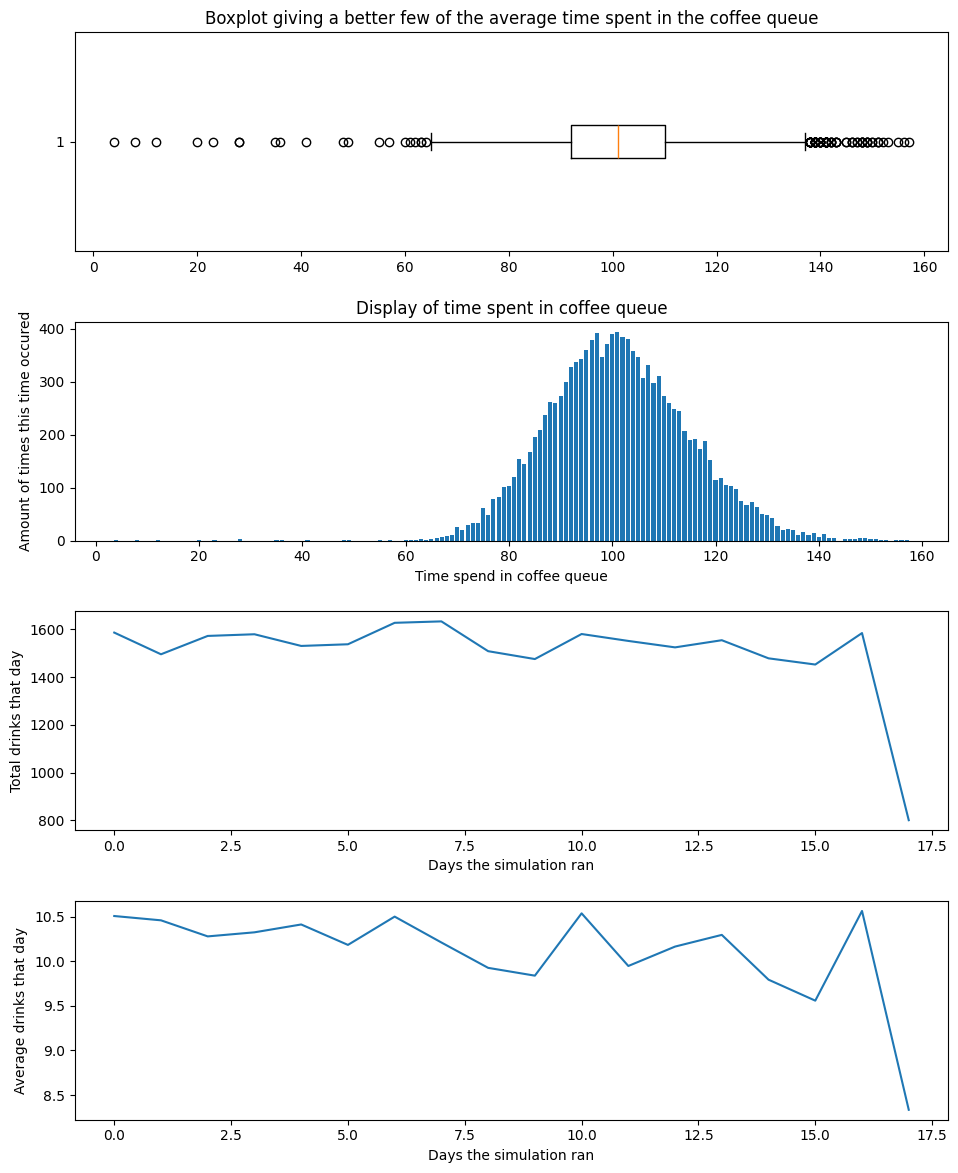

In [120]:
queue_data = df[df["Action"] == "Co"]
unique_durations, counts_durations = np.unique(queue_data["Duration"], return_counts=True)
counts_durations, unique_durations

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), dpi=100)
fig.tight_layout(pad=3) 

ax[0].boxplot(queue_data["Duration"], vert=False)
ax[0].set_title("Boxplot giving a better few of the average time spent in the coffee queue")

ax[1].bar(unique_durations, counts_durations)
ax[1].set_title("Display of time spent in coffee queue")
ax[1].set_xlabel("Time spend in coffee queue")
ax[1].set_ylabel("Amount of times this time occured")

indexes_queue_data = queue_data.groupby(["Name", "Day"])["Total Drinks"].transform(max) == df["Total Drinks"]
sum_total_drinks = df[indexes_queue_data].groupby("Day")["Total Drinks"].sum()
avg_total_drinks = df[indexes_queue_data].groupby("Day")["Total Drinks"].mean()

ax[2].plot(np.arange(len(sum_total_drinks)), sum_total_drinks)
ax[2].set_xlabel("Days the simulation ran")
ax[2].set_ylabel("Total drinks that day")

ax[3].plot(np.arange(len(sum_total_drinks)), avg_total_drinks)
ax[3].set_xlabel("Days the simulation ran")
ax[3].set_ylabel("Average drinks that day")
plt.show()

In [122]:
queue_data["Duration"].median()

101.0

In the plots above is visible how much time the students spent inside the `coffee_state`, taking into account that all they do in the coffee state is wait in line and get coffee the plots indicate how much time was spent inside of the coffee queue. They spent an average of 101 time steps inside of the queue, which in our simulation indicates a little over 15 minutes. 

Taking the `15 minutes` or `101 timesteps` as baseline in my project, it's time to move on. In my opinion there is two ways to move onwards from this point, one would be to create more states to simulate realism, such as a `wandering_state` as students dont spend all their time moving from class through the hallway to the coffee machine. Or we could introduce a `break_state` indicating that students need to be on a break before being able to get coffee.

### Characteristics 

Another way would be to introduce characteristics for students, which is the route i started with. In the base simulation the students always enter the queue no matter how long this queue is, which seems unlogical to me. 

A student will have a `waiting_patience`, this indicates length of the queue a student can tolerate before deciding to come back later